# Part I - Loan Data from Prosper
## by Rickson Osebe

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# high-level overview of data shape and composition
print(loan.shape)
print(loan.dtypes)
print(loan.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [4]:
# descriptive statistics for numeric variables
print(loan.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

In [5]:
loan.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What is the structure of your dataset?

> The dataset contains 113937 loan data with 81 variables. There are 61 numerical variables and 20 categorical variables.

### What is/are the main feature(s) of interest in your dataset?

> I am intrested in determing the essential features for determining the amount of loan that is awarded to an individual

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will use these features: ListingCategory, IsBorrowerHomeowner, CurrentlyInGroup, DebtToIncomeRatio and StatedMonthlyIncome.

## Univariate Exploration

I will start by looking at the distribution of the main variable of intrest: LoanOriginalAmount


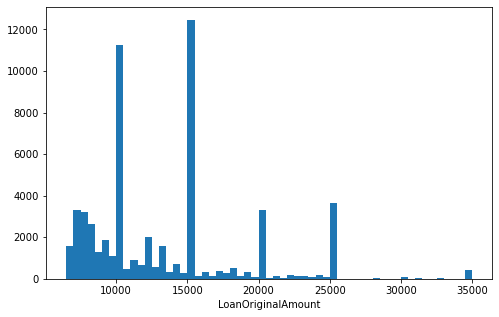

In [6]:
bins = np.arange(6500, loan['LoanOriginalAmount'].max()+500, 500)
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount')
plt.show()

There are large spikes at 10000 and 15000 and some small spikes at 20000 and 35000. This implies the initial amount of loans that are usually lended to individuals.

Looking into another variable of intrest: DebtToIncomeRatio

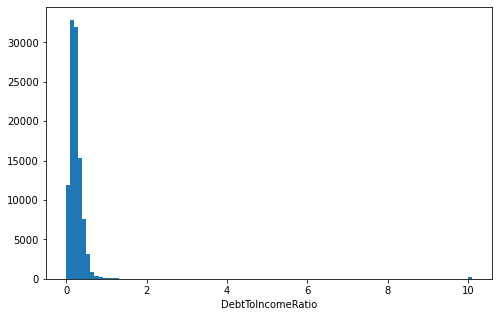

In [7]:
plt.figure(figsize=[8, 5])
binsize = 0.1
bins = np.arange(0, loan['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = loan, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('DebtToIncomeRatio')
plt.show()

The distribution of DebtToIncomeRatio is positively skewed with most of the ratio less than 3

In [8]:
# lets find the percentage of ratios less than 3
(loan.DebtToIncomeRatio >= 3).sum() / float(loan.shape[0]) * 100

0.3589703081527511

In [9]:
# being less than 0.4% we can filter out this outliers from our data
loan = loan[loan['DebtToIncomeRatio'] < 3]

In [10]:
(loan['LoanOriginalAmount'].isna()).sum()

0

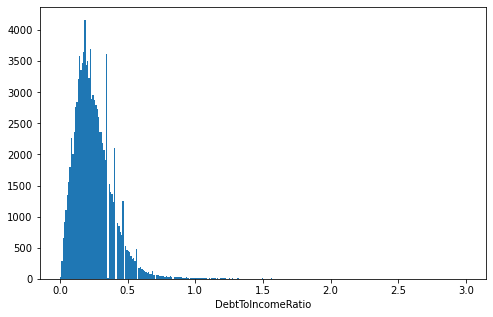

In [11]:
plt.figure(figsize=[8, 5])
binsize = 0.01
bins = np.arange(0, 3+binsize, binsize)
plt.hist(data = loan, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('DebtToIncomeRatio')
plt.show()

we can observe great spikes between 0.0 and 0.5 indicating most of the borrowers are living with loans.

looking onto another variable: StatedMonthlyIncome

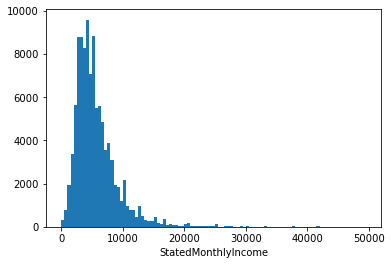

In [12]:
bins = np.arange(0, 50000, 500)
plt.hist(data = loan, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('StatedMonthlyIncome')
plt.show()

we can observe that the statedmontlyincome is skewed to the right, with most of the individuals earning a monthly salary of not more than 25000.

In [13]:
# lets observe the percentage of individuals earning not more than 25000
(loan.StatedMonthlyIncome > 25000).sum() / float(loan.shape[0]) * 100

0.4248671099510355

In [14]:
#the percentage is less than 0.5, we can remove this outliers from our data
loan = loan[loan['StatedMonthlyIncome'] <= 25000]

lets now look at our categorical variables:

In [15]:
#lets find the percentage of nulls in the emplomentstatus column
(loan['EmploymentStatus'].isna()).sum() / float(loan.shape[0]) * 100

2.109482626664626

In [16]:
#since nulls account to 2% of our data lets drop them
loan = loan[~loan['EmploymentStatus'].isna()]

In [17]:
# convert creditgrade and employment columns into ordered categorical types
creditgrades = {'CreditGrade' : ['NC', 'E',  'D', 'C', 'B', 'A', 'AA'],
               'EmploymentStatus' : ['Not employed', 'Other', 'Retired',  'Part-time', 
                                     'Full-time', 'Self-employed', 'Employed']}
for item in creditgrades:
    ordered_credit = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = creditgrades[item])
    loan[item] = loan[item].astype(ordered_credit)

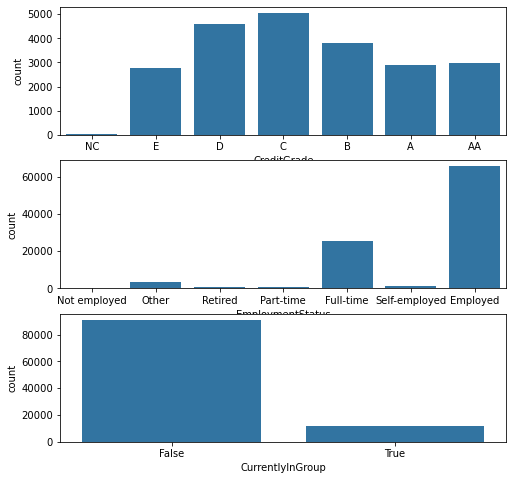

In [18]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3,figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'CreditGrade', color = default_color, ax = ax[0])
sb.countplot(data = loan, x = 'EmploymentStatus', color = default_color, ax = ax[1])
sb.countplot(data = loan, x = 'CurrentlyInGroup', color = default_color, ax = ax[2])

plt.show()

we can observe that:
    - Most of the borrowers are rated as either C or D, with others being either E, B, A or AA, there         are minimal rated as NC
    - Most of the borrowers are employed and as full time
    - Most of the borrowers are not in groups.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the loanoriginalamount is almost normal, there are no unsual points, so there is no need for any transfomation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The debttoincome ratio had some outliers with most of our ratio less than 3, it was then filtered to include values less or equal to three.
> The statedmontlyincome was found to include 99.5% values being less or equal to 25000, it was filtered to only include the values less or equal to 25000

## Bivariate Exploration

> To start off with, I want to look at the pairwise correlations present between features in the data

In [19]:
numeric_vars = ['LoanOriginalAmount', 'DebtToIncomeRatio', 'StatedMonthlyIncome']
categoric_vars = ['CreditGrade', 'EmploymentStatus','CurrentlyInGroup']

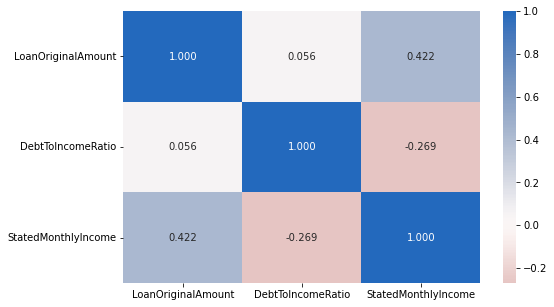

In [20]:
plt.figure(figsize = [8, 5])
sb.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

loan.shape= (102323, 81)
loan_samp.shape= (500, 81)


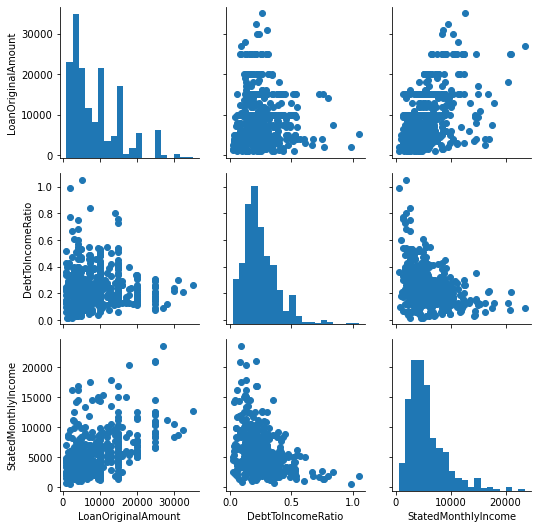

In [21]:
# plot matrix: sample 500 loans so that plots are clearer and they render faster
print("loan.shape=",loan.shape)
loan_samp = loan.sample(n=500, replace = False)
print("loan_samp.shape=",loan_samp.shape)

g = sb.PairGrid(data = loan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

The LoanOriginalAmount is observed from both the correlation matrix and the scatterplot to have a strong positive correlation with the statedmontlyincome as compared to the debtincomeratio. It can be concluded that the statedmontlyincome increases the chances of one securing a loan. This may be attributed to the fact that those with higher income have the ability to pay their loans easily.

<Figure size 1440x1440 with 0 Axes>

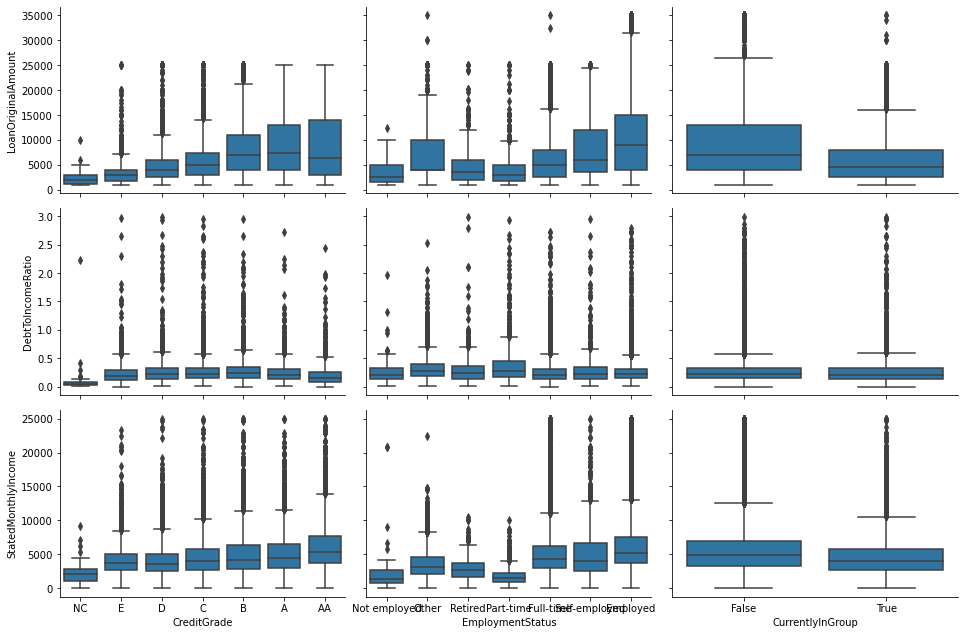

In [22]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

# Deprecated
# samples = np.random.choice(diamonds.shape[0], 2000, replace = False)


loan_samp = loan.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = loan, y_vars = numeric_vars, x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid);
plt.show();

It can be clearly observed that:
- The loanoriginalamount increases with better ratings, as there will be a lower risk of those with       good ratings paying off their loans
    
- The loanoriginalamount is seen to be higher for those employed and full-time. 
    
- Most of those taking loans can be noted as being non-members of groups, group members may acquire       loans from their groups so need to take prosperloans decreases.
    
- The debttoincome ratio can be noted to be almost indifferent among the different classes.
    
- Those earning higher montly income are associated with good ratings and they happen to be               individuals mostly with employment.

Finally, let's look at relationships between the three categorical features

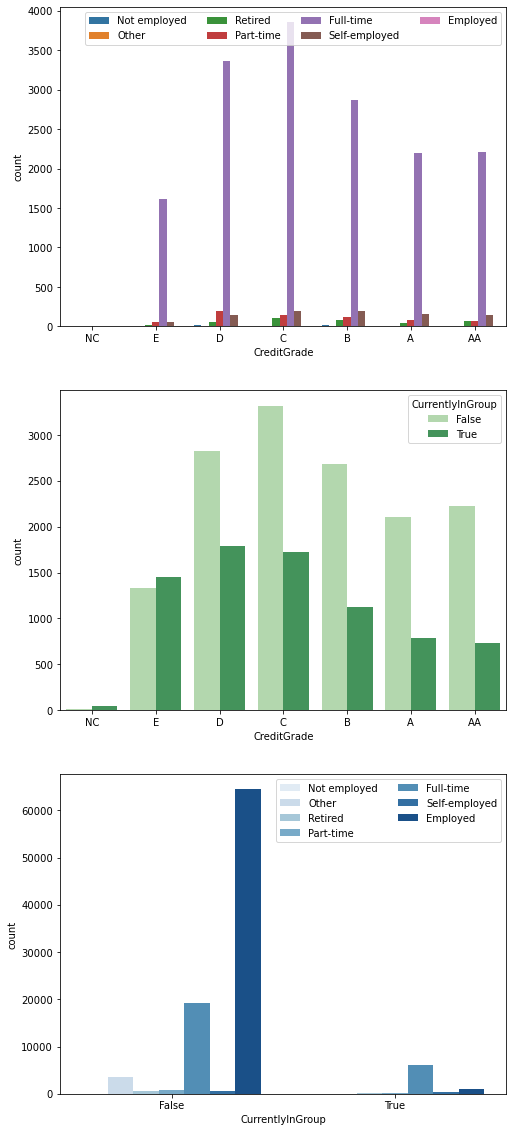

In [23]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 20])

# subplot 1: CreditGrade vs EmploymentStatus
ax = plt.subplot(3, 1, 1)
sb.countplot(data = loan, x = 'CreditGrade', hue = 'EmploymentStatus')
ax.legend(loc=1, ncol = 4) # re-arrange legend to reduce overlapping

# subplot 2: CreditGrade vs. CurrentlyInGroup
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan, x = 'CreditGrade', hue = 'CurrentlyInGroup', palette = 'Greens' )


# subplot 3: CurrentlyInGroup vs. EmploymentStatus, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan, x = 'CurrentlyInGroup', hue = 'EmploymentStatus', palette = 'Blues')
ax.legend(loc = 1, ncol = 2)

plt.show()

- We can observe that the full time employed individuals are dorminant all over with ratings ranging     from A to E, other employer types seems to be consistent in the ratings
- Most of the individuals with good ratings are not in groups, they may have obtained them due to         constant access to and repayment of loans from the banks.
- Most of the individuals in groups are mostly employed.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The loan amount is positively correlated with the stated monthly income, this clearly states that individuals with higher incomes are able to obtain higher amounts of loans since they have a higher capability of paying back.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Good credit rating is associated with higher stated montly income, this is due to lower risk of them defaulting on the loans taken, since they have a high potential of paying back.

## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the three categorical measures (CreditGrade, EmploymentStatus, CurrentlyInGroup) play into the relationship between LoanOriginalAmount and StatedMonthlyIncome.

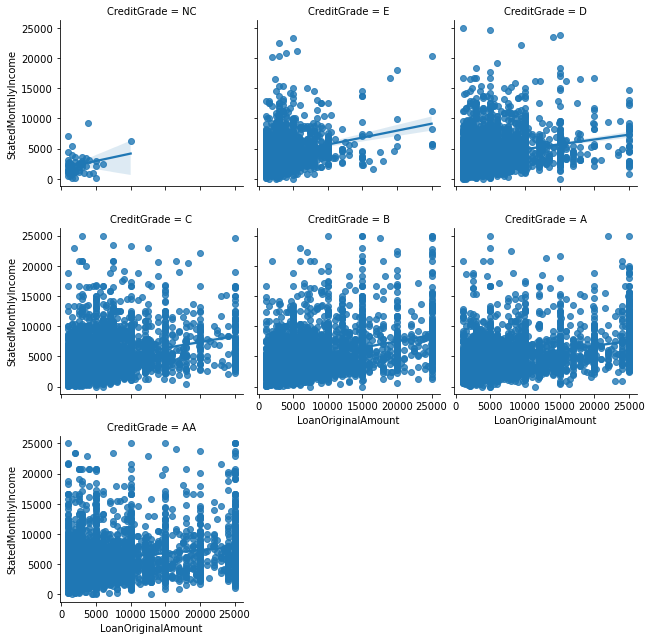

In [24]:
# create faceted heat maps on levels of the CreditGrade variable
g = sb.FacetGrid(data = loan, col = 'CreditGrade', col_wrap = 3, height = 3)
g.map(sb.regplot, 'LoanOriginalAmount', 'StatedMonthlyIncome', x_jitter=0.3)
g.add_legend();

plt.show()

- It is noted that the relationship between the loan amount and the stated monthly income is positively   skewed.
- Good ratings tend to affect both the loan amount and monthly income. The loan amount increases with     increased ratings and the monthly income tends to go to the same direction.

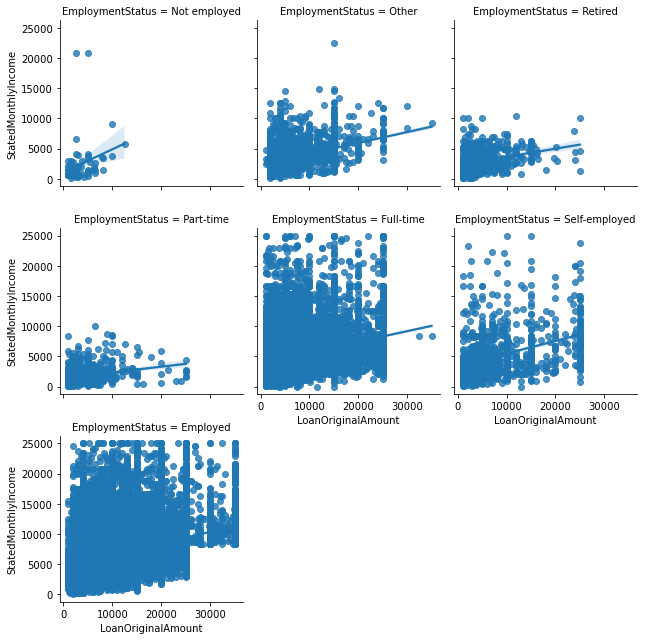

In [25]:
# create faceted heat maps on levels of the cut variable
g = sb.FacetGrid(data = loan, col = 'EmploymentStatus', col_wrap = 3, height = 3)
g.map(sb.regplot, 'LoanOriginalAmount', 'StatedMonthlyIncome', x_jitter=0.3)
g.add_legend();

plt.show()

with better employment status it can be observed that the stated monthly income keeps on improving. With worse employment status the salary is negatively affected.

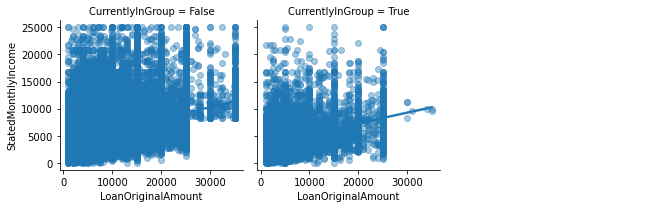

In [26]:
# create faceted heat maps on levels of the CurrentlyInGroup variable
g = sb.FacetGrid(data = loan, col = 'CurrentlyInGroup', col_wrap = 3, height = 3)
g.map(sb.regplot, 'LoanOriginalAmount', 'StatedMonthlyIncome', x_jitter=0.3, scatter_kws={'alpha':0.4})
g.add_legend();

plt.show()

The tendency of not being in a group seems to improve the loan amount and also associated with better incomes .The individuals not in groups tend to rely heavily on loans to acquire credits for their needs.

In [27]:
loan_samp = loan.sample(n=500, replace = False)

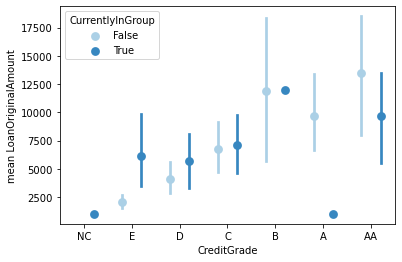

In [28]:
sb.pointplot(data = loan_samp, x = 'CreditGrade', y = 'LoanOriginalAmount', hue = 'CurrentlyInGroup',
           palette = 'Blues', linestyles = '', dodge = 0.4);
plt.ylabel('mean LoanOriginalAmount');

we can clearly note that the amount being borrowed increases with better ratings, with better ratings there is reduced default risk hence the lender is willing to lend more. It can also be noted that those not in groups generally tend to receive higher amounts of loans.

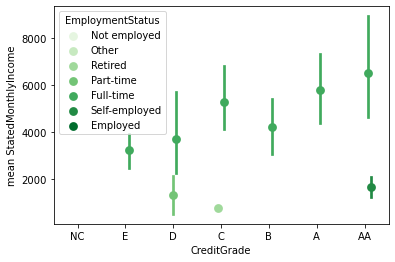

In [29]:
sb.pointplot(data = loan_samp, x = 'CreditGrade', y = 'StatedMonthlyIncome', hue = 'EmploymentStatus',
            palette = 'Greens', linestyles = '', dodge = 0.4);
plt.ylabel('mean StatedMonthlyIncome');

We can conclude that most of the individuals that have a full time or part time employment have better ratings since they do have good mean stated monthly income and they can pay off their loans easily.

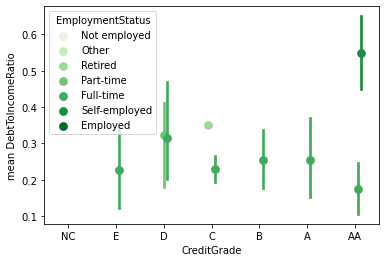

In [30]:
sb.pointplot(data = loan_samp, x = 'CreditGrade', y = 'DebtToIncomeRatio', hue = 'EmploymentStatus',
            palette = 'Greens', linestyles = '', dodge = 0.4);
plt.ylabel('mean DebtToIncomeRatio');

Individuals with full time employment happen to have ratios not exceeding 0.3, due to better salaries they reduce the expence of borrowing as they may have readily credit. The unemployed can be obsevered to be hit by high ratios.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Stated monthly income and  loan original amount have a positive interaction, which is strengtened further by good ratings. When ratings improve from C towards AA the relationship stengthness further. This may be attributed to good salaries reduce the default of risk on loans as the potential capability to pay increases. With inreased ratings then the amount of loan awarded increases further.
> We also can not that with stability in the employment status, the relationship strength between stated monthly salary and loan amount strengthness more. With assured employment, comes good salaries that increase the amount of loans that can be awarded to an individual. 

### Were there any interesting or surprising interactions between features?

> We can observe interaction between other variables not to be consitent at all, so no intresting interactions were observed.